<div style="border:solid Chocolate 2px; padding: 40px">

<b>Hello, Xia!👋 How are you today?</b>
    
My name is Arina, we have already met with you in the previous sprint of `Data preprocessing`. This time I will be your  reviewer again!<br />


You can find my comments in <font color='green'>green</font>, <font color='gold'>yellow</font> and <font color='red'>red</font> boxes. Examples you can see below:
    
<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> In case if task is completely correct and everything is alright!
</div>


<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary</h2>
    <br/>
<b>Remarks and recommendations📌:</b>  In case when I can give some advice that can help you to improve your work or recommend you some useful links and resources that can help you widen your knowledge and help in future tasks.
</div>

<div class="alert alert-block alert-danger">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Needs fixing!🤔:</b> In case when step requires some extra work and some corrections. Project can't be accepted with comments in the red boxes
</div>

Please pay attention to not move or change my comments. It would be good to highlight your answers in some way. 

#### <font color='Purple'>Student's commentary:</font> for example like this</div>
    
OK, now let's go!😏
</font>

# Research on car sales ads
### Author: Xia Cui



### Introduction  

The report presents the exploratory analysis of a dataset of 51525 free advertisements for vehicles on Crankshaft list, posted from 2018-05-01 to 2019-04-19. 

At the data preprocessing stage, we will address the issues of missing values and wrong data types, and also add columns where it fits in order to maximize the information it can present. 

The analysis that follows first of all examines the pattern of the advertisements in a range of factors such as price, model year, cylinders, and mileage. Then we will look at what are the characteristics of cars that tend to be gone quickly, as well as of those that stay on the list longer than most. Finally, we will take a closer look at car prices, and investigate which factors influence the price of a vehicle, using the two most popular vehicle types as examples. 

### Table of Content
#### [Part 1: data importing](#importing)  
#### [Part 2: data preprocessing](#preprocessing)  
#### [Part 3: adding new columns](#add_columns)  
#### [Part 4: exploratory data analysis](#eda)  
#### [Part 5: conclusion](#conclusion)  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

### Part 1: Data importing

<a id="importing"></a>

In [2]:
vehicles = pd.read_csv('https://code.s3.yandex.net/datasets/vehicles_us.csv')
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [3]:
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
vehicles.shape

(51525, 13)

**Let's also take a look at the summary data of the numeric variables.**

In [5]:
vehicles.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Part 1 conclusion
The dataset contains 51525 rows and 13 columns. a quick look at its first 5 rows and the general information reveals a number of issues that need to be addressed in the data preprocessing stage next. These include missing values, data type (e.g. date_posted), and some suspicious values (e.g. the 1 dollar car price). We will further examine these in the next section. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, you have pointed out very important things about the data and you have outlined the plan of action, so, let's see what you have got at the next steps of the analysis!

<a id="preprocessing"></a>

### Part 2: Data preprocessing

**Addressing missing values**

In [6]:
vehicles.isnull().sum(axis = 0)

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

We can see that, out of the 13 columns, 5 columns have missing values. To have a better idea of the impact of these, let's calculate the percentage of missing values in the dataset. 

In [7]:
100*vehicles.isnull().sum(axis = 0) / vehicles.shape[0]

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

**Missing values for 'is_4wd'**

It seems that none of the missing values can be considered trivial in the five columns,especially for the 'is_4wd' variable. However, a closer look at the data description earlier shows that all the values in this column is '1', indicating the car is 4_wd. It is reasonable to believe that the missing values should have been '0', indicating that the car is not 4_wd. So the missing values for this variable is relatively easier to solve. We can simply replace the NaN with '0'. 

In [8]:
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)
vehicles['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, fine, here your decision is absolutely correct!

Before we decide what to do with the missing values in the other four columns, let's examine them first. 

**Missing values for 'model_year'**

In [9]:
vehicles[vehicles['model_year'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


It might be tricky to replace the missing values in 'model_year'. While it is reasonable to believe that, quite often, the more odometers a car has, the older it could be, to fill in the model year based on its odometer would be over generalizing. Moreover, model_year potentially could be a key parameter in its sale price, therefore we need to be especially careful how to replace these, or whether to replace these at all. For now, let's keep the column as it is and decide what to do with it later. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, it is great, that you tried to point out the risks of filling the missing values using data in other columns. It is very important in terms of data corruption!

**Missing value for 'cylinders'**

In [10]:
vehicles[vehicles['cylinders'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17


It is possible that the number of cylinders is dependant on the car model. Let's check using the first two in dataset above. 

In [11]:
vehicles[vehicles['model']=='honda pilot']['cylinders'].value_counts()

6.0    269
4.0      2
8.0      2
5.0      1
Name: cylinders, dtype: int64

In [12]:
vehicles[vehicles['model']=='chrysler 300']['cylinders'].value_counts()

6.0    216
8.0     58
4.0      5
Name: cylinders, dtype: int64

Our assumption seems to hold some truth. For each car model, there is a dominant cylinder number. Although it would not be entirely accurate, it's relatively safe to use the dominant cylinder number of each model to replace the missing values in the cylinder column. 

In [13]:
vehicles["cylinders"] = vehicles.groupby("model")[
    "cylinders"].transform(lambda x: x.fillna(x.mode()[0]))

Let's check if the null values have been filled. 

In [14]:
vehicles["cylinders"].isna().sum()

0

It's all done for cylinders. Now let's continue with 'odometer'.

**Missing values for 'odometer'**

In [15]:
vehicles[vehicles['odometer'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,0.0,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,0.0,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,0.0,2018-07-26,43


It is possible to fill up the missing values in odometer using the median values based on 'model_year'. However, we know that there are missing values in 'model_year' as well. So we need to check how many have missing values in both columns. 

In [16]:
vehicles[(vehicles['odometer'].isna()) & (vehicles['model_year'].isna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
159,23300,NaN,nissan frontier crew cab sv,good,6.0,gas,NaN,other,pickup,grey,1.0,2018-07-24,73
260,14975,NaN,toyota 4runner,good,6.0,gas,NaN,automatic,SUV,silver,0.0,2018-05-13,57
370,4700,NaN,kia soul,good,4.0,gas,NaN,manual,sedan,white,0.0,2019-01-14,50
586,26000,NaN,toyota rav4,like new,4.0,gas,NaN,automatic,SUV,NaN,0.0,2018-08-09,29
659,8400,NaN,volkswagen jetta,good,4.0,diesel,NaN,manual,wagon,NaN,0.0,2018-10-22,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51195,21999,NaN,ram 2500,good,6.0,diesel,NaN,automatic,truck,white,1.0,2018-05-10,35
51222,1000,NaN,acura tl,good,6.0,gas,NaN,automatic,sedan,grey,0.0,2018-12-09,23
51257,6500,NaN,toyota corolla,good,4.0,gas,NaN,automatic,sedan,white,0.0,2018-10-16,75
51295,3850,NaN,hyundai elantra,excellent,4.0,gas,NaN,automatic,sedan,silver,0.0,2019-03-16,83


There are 549 rows that have missing values in both 'model_year' and 'odometer'. Let's leave these rows aside and fill up the rest of the odometer missing values with the median values for that year. 

In [17]:
vehicles.loc[vehicles['model_year'].notna(), "odometer"] = vehicles[
    vehicles['model_year'].notna()].groupby("model_year")[
    "odometer"].transform(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


All the NaN values in the odometer column where the model year is not NaN should have been filled. The total NaN in this column now should be 549. Let's check. 

In [18]:
vehicles['odometer'].isna().sum()

550

There is one more. Why? let's found out this row. 

In [19]:
vehicles[(vehicles['odometer'].isna()) & (vehicles['model_year'].notna())]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59


It's a very old model. Is it possible that this is because there is only one car from this year? let's check.  

In [20]:
vehicles[vehicles['model_year'] == 1929]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59


Our suspicion is correct. We can leave this for now. 

**Missing values in 'paint_color'**

In [21]:
vehicles[vehicles['paint_color'].isna()].head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,NaN,0.0,2019-03-22,9
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,0.0,2018-08-22,8


Let's first have a look at how the colors are distributed. 

In [22]:
vehicles['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

We can either fill the missing values with the dominant car color, 'white', or with the dominate car color of same model. Let's take the second approach so white wouldn't become even more dominant. 

In [23]:
vehicles["paint_color"] = vehicles.groupby("model")[
    "paint_color"].transform(lambda x: x.fillna(x.mode()[0]))

In [24]:
vehicles['paint_color'].isna().sum()

0

Now we've filled up all the NA values that we could. Let's check what's there left. 

In [25]:
vehicles.isnull().sum(axis = 0)

price              0
model_year      3619
model              0
condition          0
cylinders          0
fuel               0
odometer         550
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

While we are here, let's also check if there are any duplicated rows. 

In [26]:
vehicles.duplicated().sum()

0

No duplicated row!! 

All the missing values left are the 'model_year' missing values, and those 'odometer' missing values where the 'model_year' is also missing. 3619 rows repesent over 7% of the total dataset and is not insignificant. However, 'model_year' is a key parameter for car price and keeping these in the dataset or replace them with any other values will potentially skew the data and impact the results. let's drop these and save the dataset with a new name.

<div class="alert alert-block alert-warning">
   <h2>Reviewer's commentary</h2>
    <br/>
<b>Remarks and recommendations📌:</b> 

As for filling of missing values in columns odometer, cylinders, model_year, and price columns. 
    
They have numeric data, so we can study their correlation with the categorical variables from the dataset.

It would be reasonable to assume that the mileage and price correlate with the condition of the vehicle, and the number of cylinders and year with its model. And we can replace missing values with the medians, grouping the data by these parameters.

**Drop NA values**

In [27]:
vehicles_new = vehicles.dropna().reset_index(drop = True)
vehicles_new.shape

(47905, 13)

The new dataset has 47905 rows and 13 columns. Let's double check to see if we missed anything.

In [28]:
vehicles_new.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, everything is alright!

**Changing data types**

In [29]:
vehicles_new.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

'date_posted' should be datetime data type in order to calculate the day of the week, month and year later on.  

cylinders, and is_4wd should be integer type.  

'model_year' is float. We can leave it be because later the extracted year of the ad posting date will be integers and we can still calcuate the age of the cars using those two columns. 

In [30]:
vehicles_new['model_year'] = vehicles_new['model_year'].astype(int)
vehicles_new.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,black,1.0,2018-06-23,19
1,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
2,1500,2003,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,white,0.0,2019-03-22,9
3,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
4,14990,2014,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


In [31]:
vehicles_new['date_posted'] = pd.to_datetime(vehicles_new['date_posted'], format = '%Y-%m-%d')

In [32]:
vehicles_new['cylinders'] = vehicles_new['cylinders'].astype(int)

In [33]:
vehicles_new['is_4wd'] = vehicles_new['is_4wd'].astype(int)

In [34]:
vehicles_new.dtypes

price                    int64
model_year               int64
model                   object
condition               object
cylinders                int64
fuel                    object
odometer               float64
transmission            object
type                    object
paint_color             object
is_4wd                   int64
date_posted     datetime64[ns]
days_listed              int64
dtype: object

Now we have the data in the types exactly what we want. Let's move on to add some new columns. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, you have correctly replaced data types, nothing to add, keep it up!

<a id="add_columns"></a>

### Part 3 : Make calculations and add them to the table

**Add a column of the day of the week when the ads were posted**

In [35]:
vehicles_new['day_of_week_posted'] = vehicles_new['date_posted'].dt.weekday

**Add column of the month the ads were placed**

In [36]:
vehicles_new['month_posted'] = pd.DatetimeIndex(vehicles_new['date_posted']).month

**Add a column of the year the ads were posted**

In [37]:
vehicles_new['year_posted'] = pd.DatetimeIndex(vehicles_new['date_posted']).year

**Add a column of the vehicle's age (in years) when the ads were placed**

In [38]:
vehicles_new['vehicle_age'] = vehicles_new['year_posted'] - vehicles_new['model_year']

**Add a column of the vehicle's average mileage per year** 

In [39]:
vehicles_new['mileage_per_year'] = vehicles_new['odometer'] / vehicles_new['vehicle_age']

**In the condition column, replace string values with a numeric scale**

In [40]:
vehicles_new['condition'] = vehicles_new[
    'condition'].replace(['salvage', 'fair', 'good', 'excellent', 'like new', 'new'],
                        [0, 1, 2, 3, 4, 5])
vehicles_new.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week_posted,month_posted,year_posted,vehicle_age,mileage_per_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,SUV,black,1,2018-06-23,19,5,6,2018,7,20714.285714
1,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
2,1500,2003,ford f-150,1,8,gas,161397.0,automatic,pickup,white,0,2019-03-22,9,4,3,2019,16,10087.312500
3,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000
4,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,2,6,2018,4,14488.500000


### Part 3 Conclusion
Now the dataset is more telling, including which weekday, month, and year the advertisements were placed, as well as vehicle's age and their mileage per year. We can easily draw on these addition columns in the exploratory analysis next. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, good, all calculations are correct here!

<a id='eda'></a>

### Part 4:  Exploratory data analysis

The exploratory analysis will first examine the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. A histogram or bar graph will be plotted for each of these parameters. 

Such informaton, together with the descriptive statistics, will allow us to identify outliers in the data, and understand how they might affect the form and readability of the graphs. Then we will decide what outliers to be filtered out of the data, and plot another set of graphs to show the data distribution along the above mentioned parameters. 

Then, we will have a look at how many days advertisements were displayed. The histogram and descriptive statistics of this parameter will allow us to understand the typical lifetime of an ad. 

Last, we'll analyze the number of ads and the average price for each type of vehicle. The two types with the greatest number of ads will then be further examined to find out which factors impact on their car prices most. 



[4.1: Distribution of car price, age, mileage, cylinders, and condition](#distribution) 

[4.2: Removing outliers](#outlier)  

[4.3: Plotting new graphs](#newgraph)  

[4.4: Studying the lifespan of advertisements](#addays)   

[4.5: Number of ads and mean prices by car type](#bytype)  

[4.6: Factors in car prices](#factor)** 

<a id="distribution"></a>

### 4.1 Distribution of car price, age, mileage, cylinders, and condition

**Price distribution**

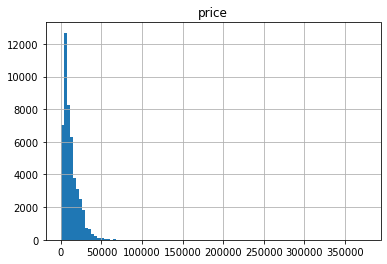

In [41]:
vehicles_new.hist('price', bins = 100, grid = True)
plt.show()

In [42]:
vehicles_new['price'].describe()

count     47905.000000
mean      12160.343304
std       10082.523707
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16900.000000
max      375000.000000
Name: price, dtype: float64

Both the histogram and statistics data of the 'price' column shows that there are outliers on both sides of the distribution. It's clear that 75% of the cars are priced 16900 and under, and the number of cars priced over 75000 is approching zero. However, it's not clear what the distribution is like on the cheaper end. To find out, let's have a look at the 10 cheapest cars.

In [43]:
vehicles_new.sort_values('price').head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week_posted,month_posted,year_posted,vehicle_age,mileage_per_year
15922,1,2014,chevrolet silverado,4,8,gas,42.0,automatic,truck,black,1,2018-10-27,16,5,10,2018,4,1.050000e+01
12504,1,2015,honda cr-v,3,4,gas,17384.0,automatic,SUV,custom,0,2018-11-14,11,2,11,2018,3,5.794667e+03
12505,1,2017,honda accord,3,10,gas,17760.0,automatic,coupe,black,1,2018-06-11,12,0,6,2018,1,1.776000e+04
22532,1,2015,ford edge,3,6,gas,78514.0,automatic,SUV,black,1,2018-07-07,49,5,7,2018,3,2.617133e+04
16776,1,1978,chevrolet suburban,2,8,gas,97500.0,automatic,SUV,blue,0,2019-03-13,35,2,3,2019,41,2.378049e+03
22531,1,2018,chevrolet silverado 1500,3,8,gas,20627.0,automatic,truck,white,1,2018-10-18,31,3,10,2018,0,inf
22529,1,2012,ford mustang,3,6,gas,110517.5,automatic,coupe,orange,1,2018-09-21,30,4,9,2018,6,1.841958e+04
22528,1,2018,ram 3500,3,10,gas,57482.0,other,truck,white,1,2018-06-22,32,4,6,2018,0,inf
22527,1,2018,ram 3500,3,6,gas,3047.0,automatic,truck,white,1,2019-01-04,3,4,1,2019,1,3.047000e+03
22453,1,2005,toyota 4runner,4,6,gas,181234.0,automatic,SUV,white,0,2018-12-25,23,1,12,2018,13,1.394108e+04


It's interesting that there are so many 1 dollar cars, and these are not particularly old cars or cars have high mileage. Could that be a mistake when entering the data? Can we safely keep these out? Let's find out the proportion of these cars. 

In [44]:
len(vehicles_new.query('price == 1')) / len(vehicles_new)

0.01557248721427826

The cars priced exactly 1 dollar represents slightly over 1 percent of the total cars. Therefore we can consider it safe to remove these outliers on the cheaper end of the price range. Now. Let's have a look at how many cars more priced over 50000, and 75000 respectively. 

In [45]:
len(vehicles_new.query('price >= 50000'))/ len(vehicles_new)

0.004571547855129945

In [46]:
len(vehicles_new.query('price >=75000')) / len(vehicles_new)

0.0005218661935079845

They both represent a very small percentage of the total cars. While it would be interesting to study these outliers, they also skew the data towards the more expensive end. For now, let's arbitrarily use 50000 as the upper threshhold for the data. Please note that this is still higher than the upper whisker (3rd quantile + 1.5 * IQR), which is 34750 if we used a boxplot to show the price distribution. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Yes, you can use IQR method for deleting the outliers. In this case the borders you have chosen look rather adequate!

**Vehicle age distribution**

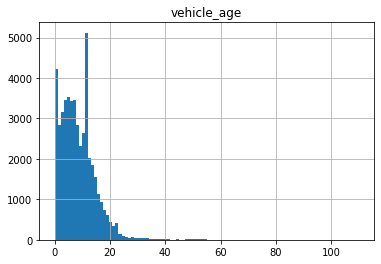

In [47]:
vehicles_new.hist('vehicle_age', bins = 100, grid = True)
plt.show()

In [48]:
vehicles_new['vehicle_age'].describe()

count    47905.000000
mean         8.555287
std          6.284593
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64

The distribution of the 'vehicle_age' shows two peaks, one at 0, meaning there are lots of cars on sale which are quite new, and one around 10 years. 75% of the cars are aged 12 years and under, but there are some outliers on the older side of the distribution, the oldest one being 110 years old. The distribution seems to be thinnning out to 0 after 40 years. Let's have a look at the proportion of cars older than 40 years. 

In [49]:
len(vehicles_new.query('vehicle_age > 40'))/len(vehicles_new)

0.00338169293393174

Cars older than 40 years only represents a very small proportion. It's safe to remove these. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, agree with you!

**Odometer distribution**

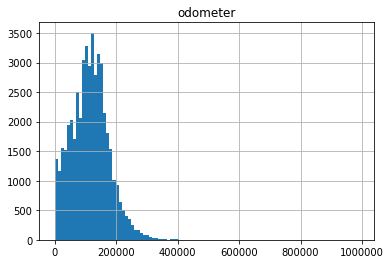

In [50]:
vehicles_new.hist('odometer', bins = 100, grid = True)
plt.show()

In [51]:
vehicles_new['odometer'].describe()

count     47905.000000
mean     115054.124131
std       62320.413708
min           0.000000
25%       73000.000000
50%      113884.000000
75%      153000.000000
max      990000.000000
Name: odometer, dtype: float64

As show in the graph and descriptive statistics, 75% of the cars have odometers less than 153000. After 300000, the numbers is approaching zero. There are clearly some outliers on the high odometers' end. Let's find out the proportion of cars having over 300000 odometers (3rd quantile + 1.5 * IQR is 273000). 

In [52]:
len(vehicles_new.query('odometer > 300000')) / len(vehicles_new)

0.005490032355703997

In [53]:
vehicles_new.query('odometer > 300000')['vehicle_age'].describe()

count    263.000000
mean      15.433460
std        6.102366
min        0.000000
25%       12.000000
50%       15.000000
75%       19.000000
max       54.000000
Name: vehicle_age, dtype: float64

It's a very small proportion. A quick look at the age distribution of these high odometer cars also shows that these are not exclusively old cars only. We can consider removing these outliers. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, good job!

**Cylinders**

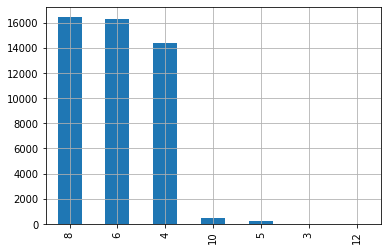

In [54]:
vehicles_new['cylinders'].value_counts().plot(kind = 'bar', grid = True)
plt.show()

As shown in the graph, most of the cars have 4, 6, or 8 cylinders. The bar for 3 and 12 is very low and it's really hard to see. Let's find out how many cars have 3 or 12 cylinders. 

In [55]:
len(vehicles_new.query('cylinders in (3, 12)'))

35

Only 35!

**Car conditions**

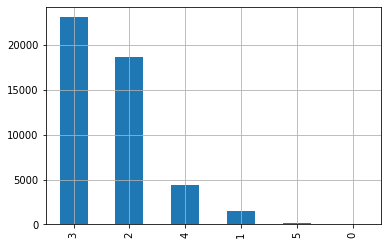

In [56]:
vehicles_new['condition'].value_counts().plot(kind = 'bar',grid = True)
plt.show()

As shown above, most of the cars' condition are 3, or 2, excellent and good respectively. There are some cars that are new (5), and barely any are salvage(0)

<a id="outlier"></a>

### 4.2 Removing outliers

Given the information shown in the graphs above, let's remove the cars that are priced 1 or over 50000, older than 40 years, and have odometers of more than 300000. In order not to lose any data, we will keep the outliers in a separate dataset. 

**Slicing data**

In [57]:
vehicles_filtered = vehicles_new.query(
    'price != 1 & price <= 50000 & vehicle_age <= 40 & odometer <= 300000')

In [58]:
len(vehicles_filtered)/len(vehicles_new)

0.9713182340048012

Slightly less than 3 percent of the data is filtered out. It's reasonable. We can proceed to save the data that is filtered out in a separate dataset and use the filtered data for the following exploratory analysis. 

In [59]:
vehicles_filtered_out = vehicles_new.query(
    'price == 1 | price > 50000 | vehicle_age > 40 | odometer > 300000')

In [60]:
len(vehicles_filtered_out)/len(vehicles_new)

0.02868176599519883

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
It is great that your strategy of dealing with outliers not lead to the great loss in the data! Keep it up!

<a id="newgraph"></a>

### 4.3 New graphs

Let's use the filtered data to plot new histograms. To see the comparison, we'll plot the two graphs next to each other. 

**Car price**

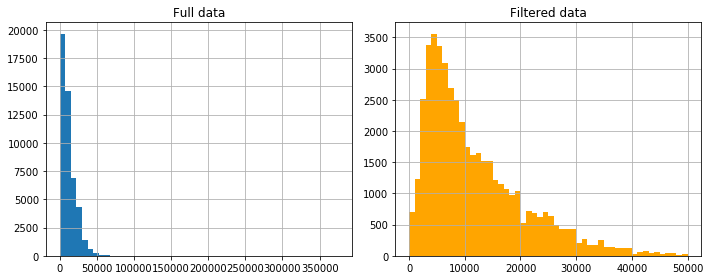

In [61]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_new['price'].hist(bins = 50, grid = True, ax = ax1)
ax1.set_title('Full data')
vehicles_filtered['price'].hist(bins = 50, grid = True, color = 'orange',ax = ax2)
ax2.set_title('Filtered data')
plt.tight_layout()                

Now the histogram for the filtered data is more readable. It shows the peak of the car prices just under 5000, and then the number descreases as the price goes up. 

Let's plot the histograms for the vehicles' age next. 

**Vehicle age**

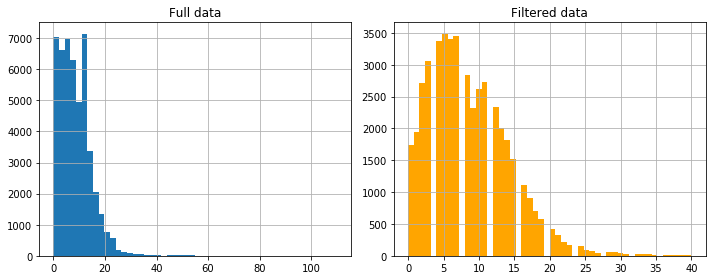

In [62]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_new['vehicle_age'].hist(bins = 50, grid = True, ax = ax1)
ax1.set_title('Full data')
vehicles_filtered['vehicle_age'].hist(bins = 50, grid = True, color = 'orange', ax = ax2)
ax2.set_title('Filtered data')
plt.tight_layout()

The full data and filtered data exhibit different peaks. While there are 3 peaks for the full data, close 0,  8, and 12 year, the peak for the filtered data center around 4-7 years old. Did the removal of these 1 dollar cars or more expensive cars do that to the data? Let's have a look. 

In [63]:
vehicles_filtered_out['vehicle_age'].describe()

count    1374.000000
mean       10.497089
std        16.201514
min         0.000000
25%         0.000000
50%         3.000000
75%        14.000000
max       110.000000
Name: vehicle_age, dtype: float64

Indeed, in the filtered out data, the mean age of the cars is 10 years old. Taking these away from the data, the vehicle age distribution shows different peaks from before. We are not going to do anything for the moment but it's good to keep this in mind. 

**Odometer**

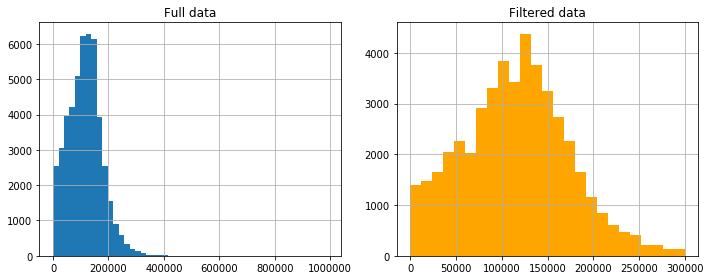

In [64]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_new['odometer'].hist(bins = 50, grid = True, ax = ax1)
ax1.set_title('Full data')
vehicles_filtered['odometer'].hist(bins = 25, grid = True, color = 'orange', ax = ax2)
ax2.set_title('Filtered data')
plt.tight_layout()  

The histogram of the mileage from the filtered data is much more readable and informative. It shows a peak around 125000, and right skewed. 

**Cylinders**

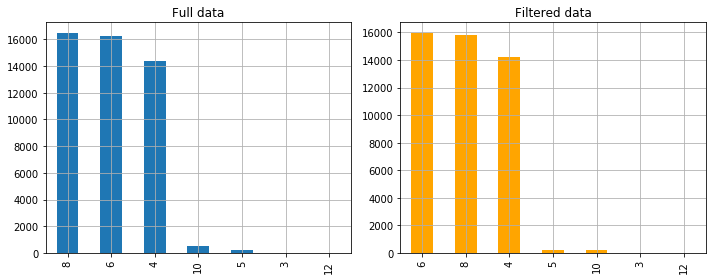

In [65]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_new['cylinders'].value_counts().plot(kind = 'bar', grid = True, ax = ax1)
ax1.set_title('Full data')
vehicles_filtered['cylinders'].value_counts().plot(
    kind = 'bar', grid = True, color = 'orange', ax = ax2)
ax2.set_title('Filtered data')
plt.tight_layout()

Filtering the data changed the ranking postion of 6 and 8, as well as 5 and 10. This indicates that most of the cars filtered out have 8 cylinders. 

**Car condition**

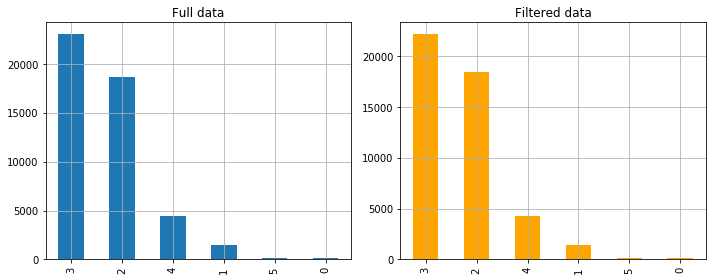

In [66]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_new['condition'].value_counts().plot(kind = 'bar', grid = True, ax = ax1)
ax1.set_title('Full data')
vehicles_filtered['condition'].value_counts().plot(
    kind = 'bar', grid = True, color = 'orange', ax = ax2)
ax2.set_title('Filtered data')
plt.tight_layout()

The distribution of the car conditions didn't change much, which is great! The cars that dominate are still **good** and **excellent**! 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, you have chosen the correct types of graphs and what is important - you have correctly formatted them, adding the common titles to your plots. I would like to recommend you to ad x and y-axis labels for more informativity and readability!

<a id="addays"></a>

### 4.4 Life span of car advertisements

In this section, we will study how many days advertisements were displayed (days_listed) and describe the typical lifetime of an ad. We will also take a closer look at what kind of cars were removed quickly, and what kind were listed for an abnormally long time.

Just to be sure that, by filtering the data, we didn't change the distribution of this parameter dramatically, let's plot two histograms for 'days_listed', using the full dataset, and the filtered dataset. 

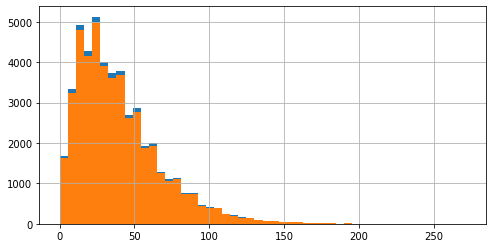

In [67]:
vehicles_new['days_listed'].hist(bins = 50, figsize = (8, 4))
vehicles_filtered['days_listed'].hist(bins = 50, figsize = (8, 4))
plt.show()

Filtering the data didn't seem to change the distribution of 'days_listed' much, which is good news.

In [68]:
vehicles_filtered['days_listed'].describe()

count    46531.000000
mean        39.571683
std         28.200146
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Using the filtered dataset, the mean for days listed is approximately 39 days, and the median 33 days. 75% of the ads were listed 53 days and under. This indicates that the typical life of a car ad is slightly over a month but less than 2 months. 

Taking a look at the extreme ends of the ad life: the longest ad life is 271 days, whereas there seems to be a lot of ads which lasted less than one day! From the graph we can also see that the numbers start to thin out fast after 150. 

Let's find out which cars have the days listed as 0, which ones have less than 7 days, which ones were listed over 150 days, and which car has the longest listing days. 

**Zero day listings**

In [69]:
vehicles_filtered.query('days_listed == 0').head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week_posted,month_posted,year_posted,vehicle_age,mileage_per_year
1165,14995,2008,chevrolet silverado 1500,3,8,gas,93300.0,automatic,truck,grey,1,2018-05-15,0,1,5,2018,10,9330.000000
1854,14000,1999,ford f250,3,8,diesel,137500.0,automatic,truck,red,1,2018-09-27,0,3,9,2018,19,7236.842105
2707,4000,2004,ram 1500,3,8,gas,250000.0,automatic,truck,brown,1,2018-08-13,0,0,8,2018,14,17857.142857
3702,16750,1985,chevrolet corvette,4,8,gas,24540.0,automatic,hatchback,white,0,2018-10-14,0,6,10,2018,33,743.636364
4254,5000,2007,toyota corolla,2,4,gas,223000.0,manual,sedan,silver,0,2018-07-11,0,2,7,2018,11,20272.727273


In [70]:
len(vehicles_filtered.query('days_listed == 0'))

49

There doesn't seem to be any particular pattern among the car ads that didn't last even for a day. Could this be a mistake? 

In a real life situation, this would need to be brought to attention to the team who provided the data for further information. Fow the purpose of this report, let's have a look at ads that lastes more than 0 but gone within a week. We will artitrarily decide these are the ones that are gone quickly. 

**Cars with short advertisement life**

In [71]:
vehicles_filtered.query('0 < days_listed <= 7')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week_posted,month_posted,year_posted,vehicle_age,mileage_per_year
30,9499,2015,nissan altima,4,4,gas,51848.0,automatic,sedan,grey,0,2018-11-12,7,0,11,2018,3,1.728267e+04
37,8000,2009,ford f-150,2,8,gas,234000.0,automatic,truck,black,1,2019-03-31,1,6,3,2019,10,2.340000e+04
57,5200,2006,toyota highlander,2,6,gas,186000.0,automatic,SUV,green,0,2018-12-20,2,3,12,2018,12,1.550000e+04
70,6950,2005,chevrolet tahoe,3,8,gas,186021.0,automatic,SUV,black,1,2018-10-30,3,1,10,2018,13,1.430931e+04
111,33900,2018,chevrolet silverado 1500 crew,2,8,gas,11315.0,other,pickup,white,1,2019-03-01,2,4,3,2019,1,1.131500e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47798,12990,2013,honda accord,3,6,gas,118659.0,automatic,coupe,red,0,2018-05-02,6,2,5,2018,5,2.373180e+04
47836,4700,2007,toyota corolla,3,4,gas,143000.0,automatic,sedan,grey,0,2018-07-17,6,1,7,2018,11,1.300000e+04
47864,7300,2016,ford fusion se,3,4,gas,106212.0,automatic,sedan,grey,0,2019-03-10,6,6,3,2019,3,3.540400e+04
47876,9500,2012,chevrolet traverse,2,6,gas,144500.0,automatic,SUV,silver,1,2019-03-05,1,1,3,2019,7,2.064286e+04


In [72]:
vehicles_filtered.query('0 < days_listed <= 7').describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_of_week_posted,month_posted,year_posted,vehicle_age,mileage_per_year
count,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2767.000000,2.767000e+03
mean,12239.842429,2009.870618,2.659198,6.089989,115093.923383,0.491507,4.790025,2.946151,6.728948,2018.295266,8.424648,inf
std,9076.218664,5.729176,0.725933,1.631508,58307.734944,0.500018,1.835321,1.989577,3.506255,0.456245,5.726536,NaN
min,5.000000,1978.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2018.000000,0.000000,0.000000e+00
25%,5495.000000,2006.000000,2.000000,4.000000,74000.000000,0.000000,3.000000,1.000000,4.000000,2018.000000,4.000000,1.107975e+04
50%,9500.000000,2011.000000,3.000000,6.000000,115828.000000,0.000000,5.000000,3.000000,7.000000,2018.000000,7.000000,1.560000e+04
75%,16987.500000,2014.000000,3.000000,8.000000,153000.000000,1.000000,6.000000,5.000000,10.000000,2019.000000,12.000000,2.210331e+04
max,49750.000000,2019.000000,5.000000,10.000000,300000.000000,1.000000,7.000000,6.000000,12.000000,2019.000000,40.000000,inf


There are 2767 car ads which are gone within a week. Let's check out the characteristics of these cars in terms of 'price', 'model_year', 'model', 'odometer', 'condition', 'transmission' and 'color', in comparision with the whole data. 

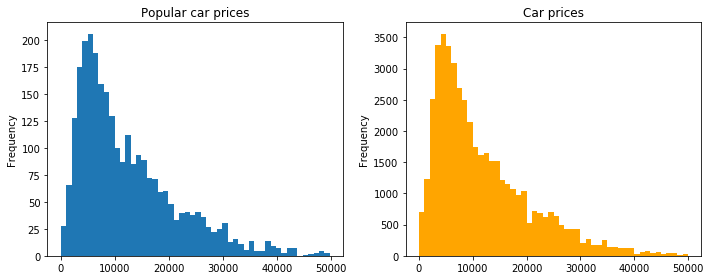

In [73]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_filtered.query('0 < days_listed <= 7')['price'].plot(
    kind = 'hist', bins = 50, title = 'Popular car prices', ax=ax1)
vehicles_filtered['price'].plot(kind = 'hist', bins = 50, color = 'orange', 
                                title = 'Car prices',ax=ax2)
plt.tight_layout() 

In [74]:
print('Popular car price median:', 
      vehicles_filtered.query('0 < days_listed <= 7')['price'].median())
print('Popular car price mean:', 
      vehicles_filtered.query('0 < days_listed <= 7')['price'].mean())
print('Car price median:', vehicles_filtered['price'].median())
print('Car price mean:', vehicles_filtered['price'].mean())

Popular car price median: 9500.0
Popular car price mean: 12239.842428623058
Car price median: 9495.0
Car price mean: 12109.169113064409


The price distribution of the popular cars is almost identical with that of all cars. There is not much difference in the mean and median price for popular cars and for all cars either. Price doesn't seem to be a deciding factor for car popularity!

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
It sounds rather reasonable and logical!

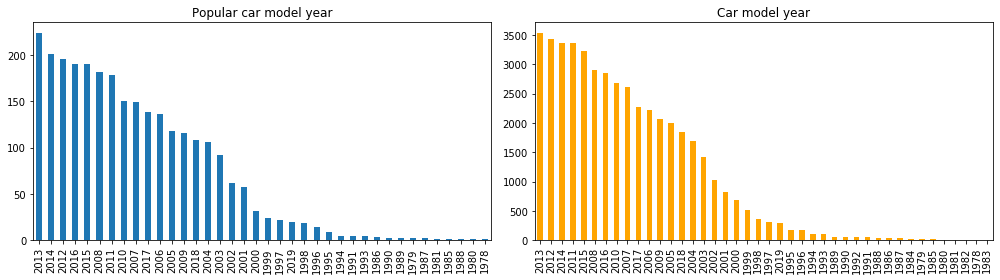

In [75]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
vehicles_filtered.query('0 < days_listed <= 7')['model_year'].value_counts().plot(
    kind = 'bar', title = 'Popular car model year', ax=ax1)
vehicles_filtered['model_year'].value_counts().plot(
    kind = 'bar', title = 'Car model year', color = 'orange', ax=ax2)
plt.tight_layout() 

The distribution is almost identical. The top three popular car model years are 2013, 2014, and 2012, which are the same as the top three year models among all cars, just in slightly different oder. 

It seems that how old a car is doesn't affect its popularity. Let's have a look at the odometer next. 

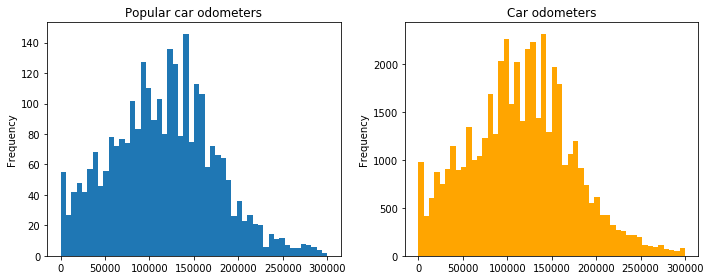

In [76]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_filtered.query('0 < days_listed <= 7')['odometer'].plot(
    kind = 'hist', bins = 50, title = 'Popular car odometers', ax=ax1)
vehicles_filtered['odometer'].plot(kind = 'hist', bins = 50, 
                                   title = 'Car odometers', color = 'orange', ax=ax2)
plt.tight_layout() 

Interestingly, odometer also doesn't seem to be impacting factor. Let's have a look at condition then. 

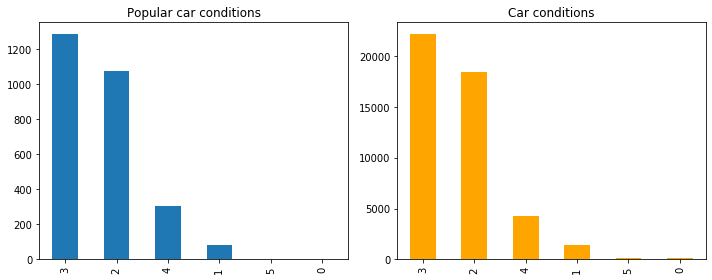

In [77]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_filtered.query('0 < days_listed <= 7')['condition'].value_counts().plot(
    kind = 'bar', title = 'Popular car conditions', ax=ax1)
vehicles_filtered['condition'].value_counts().plot(
    title = 'Car conditions', kind = 'bar', color = 'orange', ax=ax2)
plt.tight_layout() 

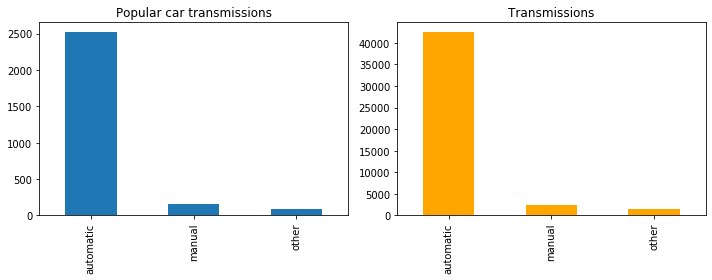

In [78]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_filtered.query('0 < days_listed <= 7')['transmission'].value_counts().plot(
    title = 'Popular car transmissions', kind = 'bar', ax=ax1)
vehicles_filtered['transmission'].value_counts().plot(
    kind = 'bar', title = 'Transmissions', color = 'orange', ax=ax2)
plt.tight_layout() 

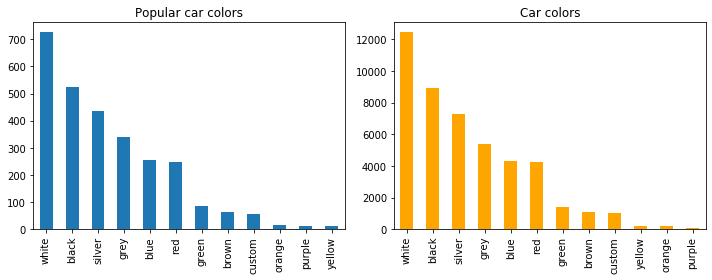

In [79]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_filtered.query('0 < days_listed <= 7')['paint_color'].value_counts().plot(
    kind = 'bar', title= 'Popular car colors', ax=ax1)
vehicles_filtered['paint_color'].value_counts().plot(
    kind = 'bar', color = 'orange', title = 'Car colors', ax=ax2)
plt.tight_layout() 

All the graphing for not much! There is indeed nothing standing out for those cars that were quickly removed! 

Now let's have a look at the car ad that have stayed for over 150 days. 

**Cars of long advertisement life**

In [80]:
vehicles_filtered.query('days_listed > 150')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_of_week_posted,month_posted,year_posted,vehicle_age,mileage_per_year
49,3800,2012,ford focus,2,4,gas,130323.0,automatic,sedan,black,0,2018-11-29,261,3,11,2018,6,21720.500000
83,18800,2015,chevrolet camaro lt coupe 2d,2,6,gas,33926.0,other,coupe,grey,0,2019-01-16,152,2,1,2019,4,8481.500000
211,8795,2014,honda civic,3,4,gas,85452.0,automatic,sedan,grey,0,2018-09-11,164,1,9,2018,4,21363.000000
647,26995,2016,chevrolet silverado,4,8,gas,36645.0,automatic,pickup,white,1,2018-09-01,152,5,9,2018,2,18322.500000
797,8595,2014,dodge charger,4,6,gas,100004.0,automatic,sedan,blue,0,2018-10-14,154,6,10,2018,4,25001.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47344,9995,2012,toyota tacoma,3,6,gas,172695.0,automatic,truck,grey,0,2018-09-19,162,2,9,2018,6,28782.500000
47471,8495,2013,hyundai elantra,2,4,gas,55262.0,automatic,sedan,blue,0,2018-06-30,158,5,6,2018,5,11052.400000
47717,3500,2005,toyota camry,3,4,gas,208299.0,automatic,sedan,green,0,2018-06-07,159,3,6,2018,13,16023.000000
47870,1200,2005,volkswagen jetta,1,5,gas,185000.0,automatic,sedan,grey,0,2018-10-10,158,2,10,2018,13,14230.769231


There are 218 car ads fitting the criterion. 

Now let's compare the parameters between those cars and all cars.

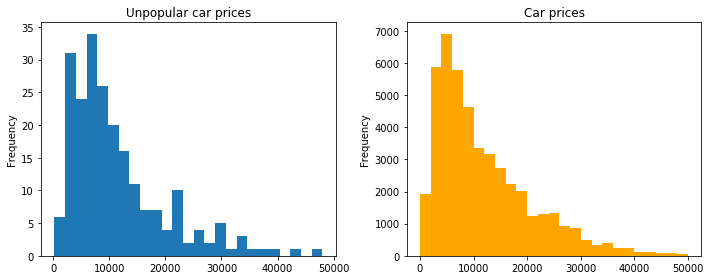

In [81]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_filtered.query('days_listed >150')['price'].plot(
    kind = 'hist', bins = 25, title = 'Unpopular car prices', ax=ax1)
vehicles_filtered['price'].plot(kind = 'hist', bins = 25, color = 'orange', 
                                title = 'Car prices', ax=ax2)
plt.tight_layout() 

Compared to the price distribution for all cars, there seems to be a peak for not so popular car prices around 3000, then again around 6000. Let's take a look at the mean and median prices for both groups. 

In [82]:
print('Unpopular car price median:', 
      vehicles_filtered.query('days_listed > 150')['price'].median())
print('Unpopular car price mean:', 
      vehicles_filtered.query('days_listed > 150')['price'].mean())
print('Car price median:', vehicles_filtered['price'].median())
print('Car price mean:', vehicles_filtered['price'].mean())

Unpopular car price median: 8745.0
Unpopular car price mean: 11441.188073394496
Car price median: 9495.0
Car price mean: 12109.169113064409


While the price distributions for both groups are similar, the unpopular cars have a slightly lower median and mean prices compared with these for all the cars. 

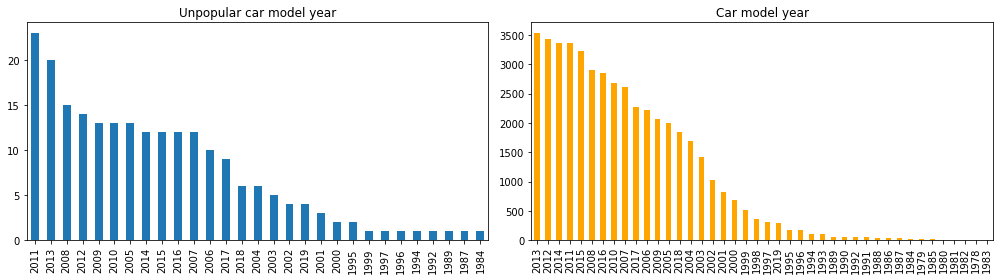

In [83]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
vehicles_filtered.query('days_listed >150')['model_year'].value_counts().plot(
    kind = 'bar', title = 'Unpopular car model year', ax=ax1)
vehicles_filtered['model_year'].value_counts().plot(
    kind = 'bar', color = 'orange', title = 'Car model year', ax=ax2)
plt.tight_layout() 

The top 5 unpopular car model years are 2011, 2013, 2008, 2012, and 1009, slightly different from the top 5 car model years: 2013, 2012, 2014, 2011, and 2015. 

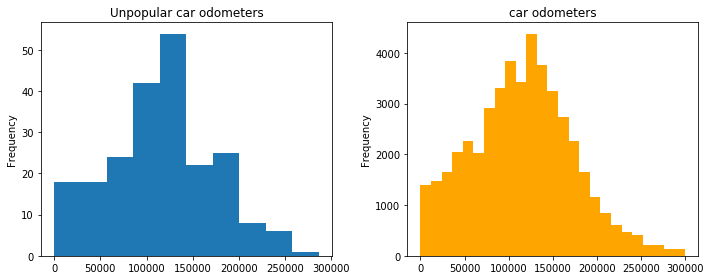

In [84]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_filtered.query('days_listed > 150')['odometer'].plot(
    kind = 'hist', bins = 10, title = 'Unpopular car odometers', ax=ax1)
vehicles_filtered['odometer'].plot(kind = 'hist', bins = 25, 
                                   title = 'car odometers', color = 'orange', ax=ax2)
plt.tight_layout() 

In [85]:
print('Unpopular car odometer median:', 
      vehicles_filtered.query('days_listed > 150')['odometer'].median())
print('Unpopular car odometer mean:', 
      vehicles_filtered.query('days_listed > 150')['odometer'].mean())
print('Car odometer median:', vehicles_filtered['odometer'].median())
print('Car odometer mean:', vehicles_filtered['odometer'].mean())

Unpopular car odometer median: 118736.5
Unpopular car odometer mean: 116192.41513761468
Car odometer median: 115232.0
Car odometer mean: 115270.26291074767


As show in both graphs and the median and mean statistics, the odometers of the unpopular cars do not differ much from cars in general. 

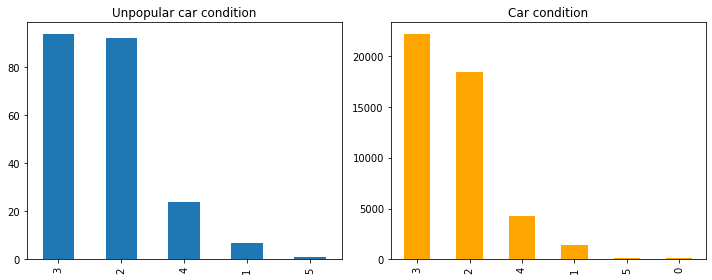

In [86]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_filtered.query('days_listed >150')['condition'].value_counts().plot(
    kind = 'bar', title = 'Unpopular car condition', ax=ax1)
vehicles_filtered['condition'].value_counts().plot(
    kind = 'bar', color = 'orange', title = 'Car condition', ax=ax2)
plt.tight_layout() 

The top 2 conditions are 3 and 2, excellent and good, which is the same to distribution of car conditions over all. The only difference is that there is no condition '0' in the unpopular cars, which is the worse conditio of all. It's interesting to see that the car conditions doesn't impact much on the car popularity either. 

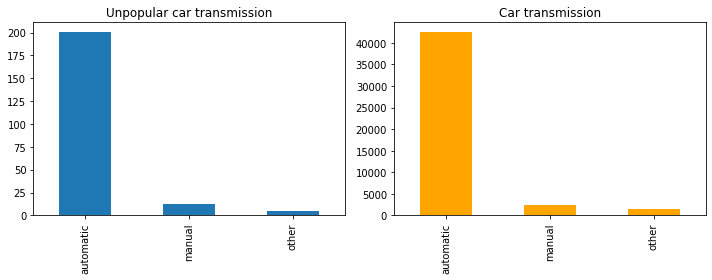

In [87]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_filtered.query('days_listed >150')['transmission'].value_counts().plot(
    kind = 'bar', title = 'Unpopular car transmission', ax=ax1)
vehicles_filtered['transmission'].value_counts().plot(
    kind = 'bar', color = 'orange', title = 'Car transmission', ax=ax2)
plt.tight_layout() 

Both groups show almost identitical distribution for car transmissions! Let's have a look at the last variable, color!

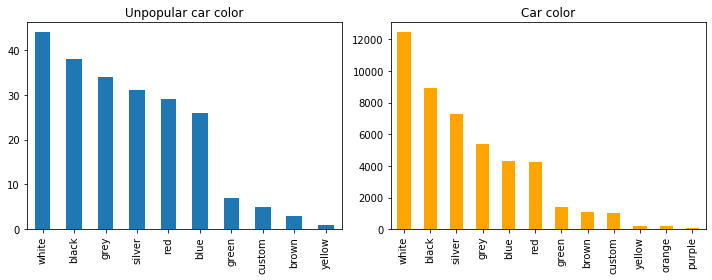

In [88]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
vehicles_filtered.query('days_listed >150')['paint_color'].value_counts().plot(
    kind = 'bar', title = 'Unpopular car color', ax=ax1)
vehicles_filtered['paint_color'].value_counts().plot(
    kind = 'bar', color = 'orange', title = 'Car color', ax=ax2)
plt.tight_layout() 

White and black dominate both groups, with grey and silver swapping places. 

### Conclusion
After we sorted out the cars by the number of days they were listed, we plotted the variables for both the popular ones (those that are gone within a week), and the unpopular ones(those have stayed over 150 days), and compared the pattern in these with all cars. 

Suprisingly, or not, no particular pattern really stands out for both the popular and unpopular cars, except that there seems to be a lot of cars around the price of 3000 that stay longer on the listing than others. 

Well, at least we now know that it is not likely that we can predict the length of time that a car ad stays on the list based on its characteristics, but what about price? Can we predict that? We will address this query in the last section of this report. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, Xia, you have managed to get extremely interesting insights from the data and your analysis, great job and very neat and deep interpretations!

<a id="bytype"></a>

### 4.5 Number of ads and mean price by car type

In this section, we will analyze the number of ads and the average price for each type of vehicle. A graph will be plotted to show the dependence of the number of ads on the vehicle type. We will also find out which two types have the greatest number of ads.

Let's first use pivot_table to calcuate the number of ads and mean price for each type of car. We will sort the table in ascending order of the number of ads.

In [89]:
vehicles_type = vehicles_filtered.pivot_table(
    index = 'type', values = 'price', aggfunc = ['count', 'mean'])
vehicles_type.columns = ('number_of_ads', 'mean_price')
vehicles_type = vehicles_type.sort_values('number_of_ads')
vehicles_type

,number_of_ads,mean_price
type,,
bus,24,17135.666667
offroad,201,14129.855721
other,229,10661.296943
convertible,376,12671.058511
van,573,10504.680628
hatchback,962,6957.200624
mini-van,1069,8067.755847
wagon,1423,9095.635278
coupe,1982,14268.399092


Now let's plot the number and price. 

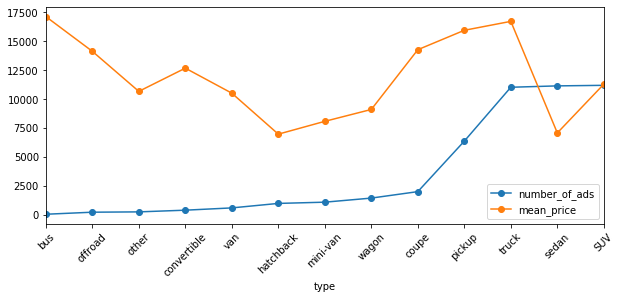

In [90]:
vehicles_type.plot(style = 'o-', figsize = (10, 4))
plt.xticks(rotation=45)
plt.xticks(np.arange(len(vehicles_type.index)), vehicles_type.index)
plt.show()

As shown in the graph above, *SUV* tops the list in its number of ads, followed by *sedan*. Now let's have a look at what factors impact their car prices most. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Yes, you are absolutely right! SUV and sedan are at the top!

<a id="factor"></a>

### 4.6 Factors in car prices

In this section, we will first generate the correlation efficients for price and the numerical variables including age, mileage, and condition. Then we will make a scatterplot for each to show their relationship with prices. 

For categorical variables (transmission type and color), a boxplot will be made to show their relationship with price. 

**Correlation coefficients**

In [91]:
vehicles_filtered.query('type == "SUV"')[[
    'price','vehicle_age', 'odometer', 'condition']].corr()

,price,vehicle_age,odometer,condition
price,1.000000,-0.648791,-0.612418,0.294974
vehicle_age,-0.648791,1.000000,0.634819,-0.332079
odometer,-0.612418,0.634819,1.000000,-0.327768
condition,0.294974,-0.332079,-0.327768,1.000000


In [92]:
vehicles_filtered.query('type == "sedan"')[[
    'price','vehicle_age', 'odometer', 'condition']].corr()

,price,vehicle_age,odometer,condition
price,1.000000,-0.671924,-0.607716,0.311434
vehicle_age,-0.671924,1.000000,0.632301,-0.310252
odometer,-0.607716,0.632301,1.000000,-0.329782
condition,0.311434,-0.310252,-0.329782,1.000000


The above numbers show that, for both SUVs and sedans, car prices have relatively strong negative relationship with their age, and total mileage, whereas their relationship with car's condition is not as strong. Let's take a closer look at the scatterplot of each of these pairs. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, the interpretation of the results of the correlation analysis is correct! We can also visualize the correlation analysis using the `heatmap` type of graphs:
    
https://towardsdatascience.com/heatmap-basics-with-pythons-seaborn-fb92ea280a6c

**Price and vehicle age**

Give the large number of data, let's use both *hexbin* and *scatterplot* to depict the relationship among the data. 

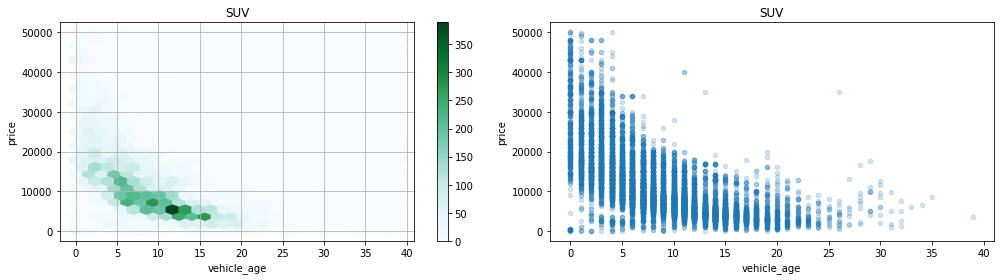

In [93]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
vehicles_filtered.query('type == "SUV"').plot(
    x = 'vehicle_age', y = 'price', kind = 'hexbin',
    gridsize=25, sharex=False, grid=True, title = 'SUV', ax = ax1)
vehicles_filtered.query('type == "SUV"').plot(
    x = 'vehicle_age', y = 'price', kind = 'scatter', title = 'SUV', alpha = 0.2, ax = ax2)
plt.tight_layout()

The graphs above show that, as SUV cars get older, not only the price overall decreases, the range of prices also become smaller. 

SUV of approximately 11 years and having the price around 7000 seem to be the most popular among the ads. Now let's have a look at the sedans. 

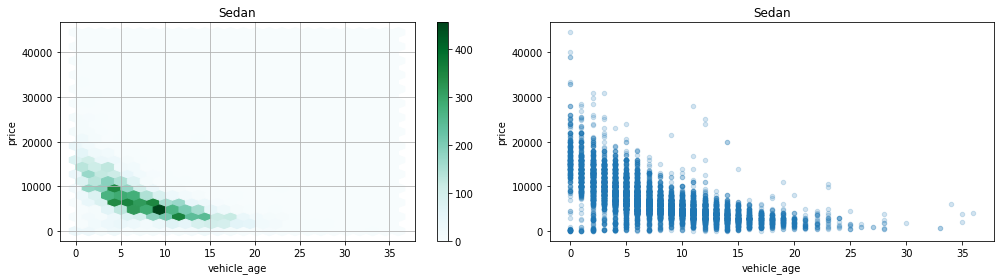

In [94]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
vehicles_filtered.query('type == "sedan"').plot(
    x = 'vehicle_age', y = 'price', kind = 'hexbin',
    gridsize=25, sharex=False, grid=True, title = 'Sedan', ax = ax1)
vehicles_filtered.query('type == "sedan"').plot(
    x = 'vehicle_age', y = 'price', kind = 'scatter', title = 'Sedan', alpha = 0.2, ax = ax2)
plt.tight_layout()

Sedans show a similar patter as SUV, with overall cheaper prices, and younger car age. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, very interesting visualization!

**Price and odometers**

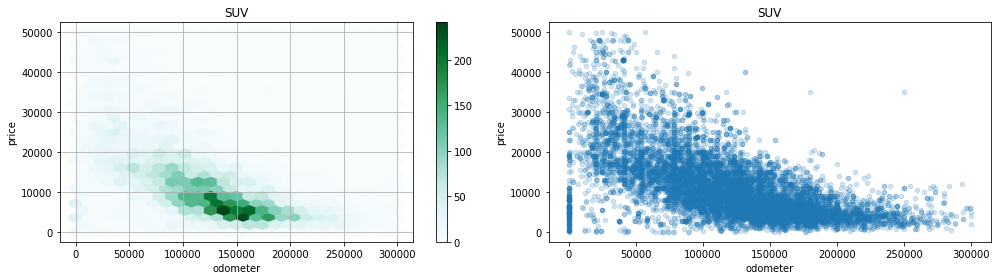

In [95]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
vehicles_filtered.query('type == "SUV"').plot(
    x = 'odometer', y = 'price', kind = 'hexbin',
    gridsize=25, sharex=False, grid=True, title = 'SUV', ax = ax1)
vehicles_filtered.query('type == "SUV"').plot(
    x = 'odometer', y = 'price', kind = 'scatter', title = 'SUV', alpha = 0.2, ax = ax2)
plt.tight_layout()

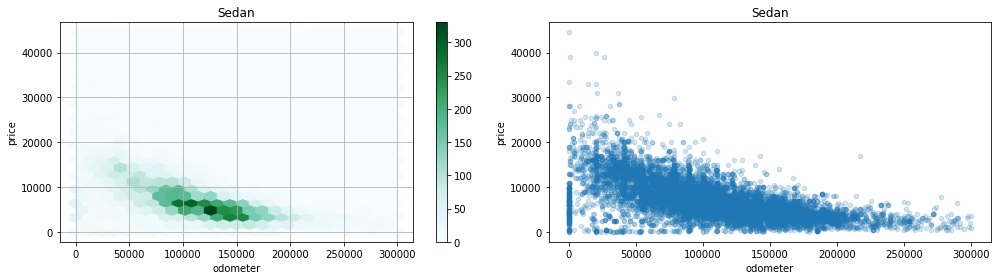

In [96]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
vehicles_filtered.query('type == "sedan"').plot(
    x = 'odometer', y = 'price', kind = 'hexbin',
    gridsize=25, sharex=False, grid=True, title = 'Sedan', ax = ax1)
vehicles_filtered.query('type == "sedan"').plot(
    x = 'odometer', y = 'price', kind = 'scatter', title = 'Sedan', alpha = 0.2, ax = ax2)
plt.tight_layout()

For both SUV and sedan cars, the graphs show a moderately strong negative correlation between prices and their total mileage. This makes sense, the older a car is, the cheaper it might sell. 

**Price and car conditions**

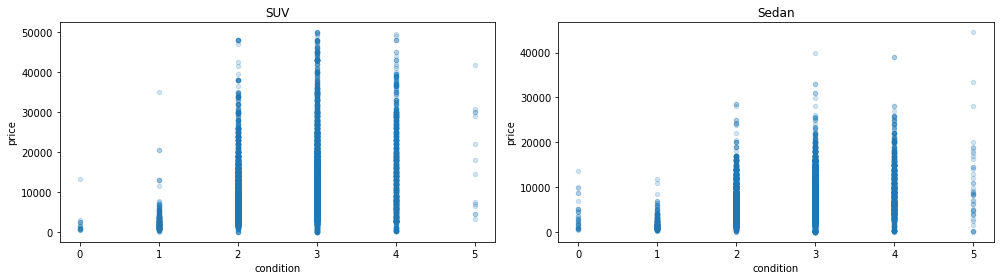

In [97]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4))
vehicles_filtered.query('type == "SUV"').plot(
    x = 'condition', y = 'price', kind = 'scatter', title = 'SUV', alpha = 0.2, ax = ax1)
vehicles_filtered.query('type == "sedan"').plot(
    x = 'condition', y = 'price', kind = 'scatter', title = 'Sedan', alpha = 0.2, ax = ax2)
plt.tight_layout()

The graphs show that cars of both **SUV** and **sedan** type cluster around condition 2, 3, 4, which correspond to **good, excellent, like new**, and the prices for these car have a wide range. 

Cars of condition 0 and 1, which are salvage and poor, are at the lower end of the price range. There are not as many new cars and but their prices seem to vary.  

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍</b> 

**Price and transmission types**

Before we plot the prices for different transmission types and colors, let's check how many ads there are in each category. 

In [98]:
vehicles_filtered.query('type == "SUV"')['transmission'].value_counts()

automatic    10629
manual         468
other           87
Name: transmission, dtype: int64

In [99]:
vehicles_filtered.query('type == "sedan"')['transmission'].value_counts()

automatic    10518
manual         547
other           71
Name: transmission, dtype: int64

In [100]:
vehicles_filtered.query('type == "SUV"')['paint_color'].value_counts()

black     3020
white     2004
silver    1865
grey      1254
blue      1034
red        836
green      432
brown      326
custom     259
orange      73
yellow      44
purple      37
Name: paint_color, dtype: int64

In [101]:
vehicles_filtered.query('type == "sedan"')['paint_color'].value_counts()

silver    2769
black     2259
grey      1953
white     1378
blue      1189
red        861
custom     246
brown      236
green      191
purple      25
yellow      21
orange       8
Name: paint_color, dtype: int64

For SUVs, yellow and purple cars have less than 50 in number, and for sedans, purple, yellow, and orange has less than 50. The boxplot wouldn't work for these categories and therefore let's remove these before the plotting. 

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


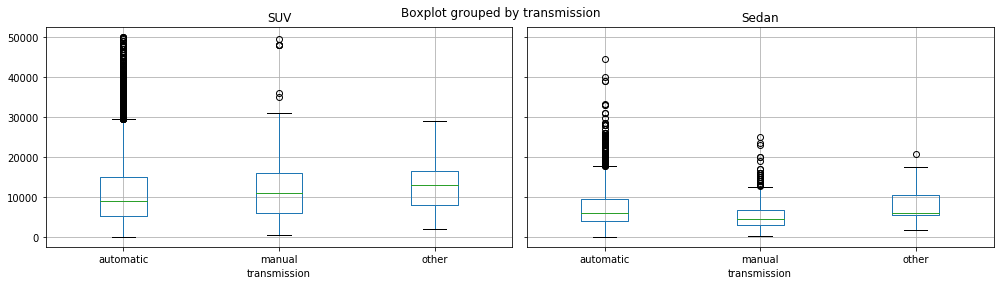

In [102]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,4), sharey = True)
vehicles_filtered.query('type == "SUV"').boxplot(
    column = 'price', by = 'transmission', ax = ax1)
ax1.set_title('SUV')
vehicles_filtered.query('type == "sedan"').boxplot(
    column = 'price', by = 'transmission', ax = ax2)
ax2.set_title('Sedan')
plt.tight_layout()

As shown in the graphs above, for the **SUV** type, manual cars have slightly higher median prices than automatic cars, whereas *other* have higher median prices than manual SUVs. It would be interesting to find out what *other* means. Automatic SUVs also have a lot of outliers towards the higher end of the price range. 

In comparison, the median prices for automatic **sedans** are more expensive then manual sedans, with both transmission types having a rather dense distribution of outliers towards the higher price end. Similar to SUVs, *other* transmission type also has a higher median price than the other two types. 

The IQR for sedans, shown as the boxes in the boxplots, are narrower than that for SUVs across all transmission types. This indicates that sedans prices have less dispersion than SUV prices.

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, it is the correct decision to use `boxplot` type of graph here!

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


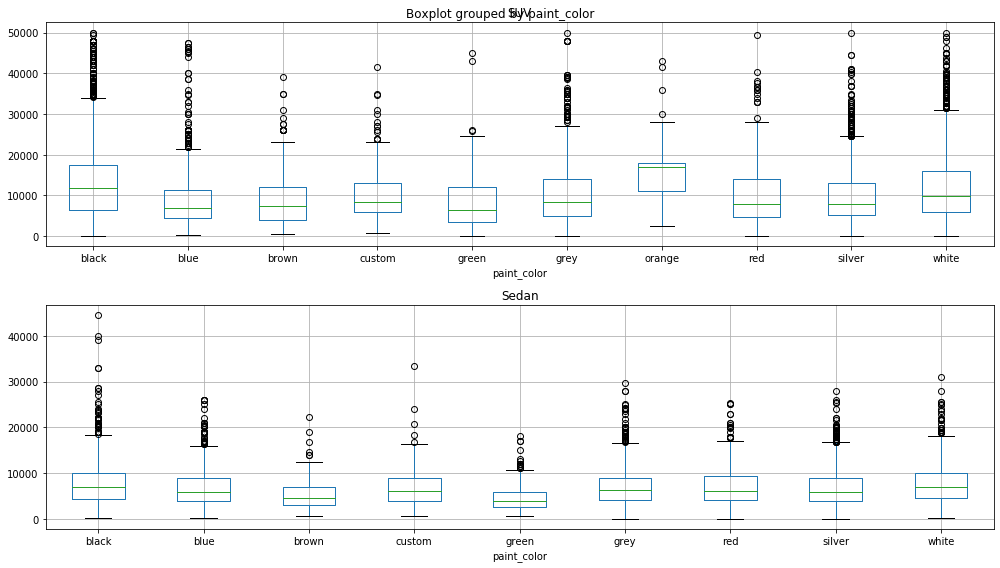

In [103]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize=(14,8))
vehicles_filtered.query(
    'type == "SUV" & paint_color not in ("purple", "yellow")').boxplot(
    column = 'price', by = 'paint_color', ax = ax1)

vehicles_filtered.query(
    'type == "sedan" & paint_color not in ("orange", "purple", "yellow")').boxplot(
    column = 'price', by = 'paint_color', ax = ax2)
ax1.set_title('SUV')
ax2.set_title('Sedan')
plt.tight_layout()

For **SUVs**, orange cars have the highest median price, followed by black and white cars. However it needs to be pointed out that there are only a total of 73 orange cars. Green SUVs have the lowest median price. Black and white SUVs also have quite densely distributed outliers over the upper whisker. Overall the car prices are right skewed. 

For **sedans**, black, custom, grey, red, silder and white have relatively higher median prices than the others. Green sedans have the lowest median price. Similar to SUVs, the prices for all colors are right skewed. However, the sedans do not have as wide dispersion as SUVs, as indicated by their narrower boxes. 

<div class="alert alert-block alert-success">
    <h2>Reviewer's commentary</h2>
    <br/>
<b>Well done!👍:</b> 
    
Ok, good job, nothing to add, I suppose you get really interesting insights from the data that can be useful for the potential "client", keep it up!

<a id="conclusion"></a>

### Part 5: Overall conclusion

The exploratory analysis in this report examined a dataset of free advertisements for vehicles on Crankshaft list over slightly less than a year.

The data was preprocessed by having the rows containing missing model years removed. The outliers as identified by car price, age, and mileage have also been moved to a separate dataset. 

Using the preprocessed data, we examined the distribution of price, model year, cylinders, and mileage. The dominant price range seems to be around 5000, age 4 to 7 years, mileage around 125,000. The most popular cylinder categories are 6, 8, and 4, and the most popular conditions are 'good' and 'excellent'.  
 
Examining the number of days the advertisements are listed, we discoverd those that were gone with a week, and those that have stayed for over 5 months! However, a closer look at each of the parameters of those quick gone and 'permanent resident' cars doesn't really show any particular patterns. 

We also found that the types of cars that have the most advertisements are SUVs and sedans, whose prices are most negatively impacted by their mileage and age. 

Finally, it would also be interesting to examine the outliers, depending on what questions we are asking. However, this is beyond the scope of this report. There are also a couple of issues that might need attention of the team who provided the data,  such as the missing model year values, and the 1 dollar car price. 

<div style="border:solid Chocolate 2px; padding: 40px">

**The overall review conclusion**

Xia, thank you for submitting your project! I can see that you've worked really hard on it! You did a great job to bring the project to completion, thanks for your patience and desire to complete the project! Your project seems to be really ideal as at the previous time!
    
I am really impressed with the quality of your work, so I hasten to say that your project has been accepted and you can proceed to the next sprint!

**Good things and practices in your project I want to highlight🙂**:
* As in the previous sprint, it was a pleasure for me to review your project!
* You use different methods for working with your data. It is really great that you can apply these methods on practice, keep it up!
* I would like to additionally highlight your deep and responsible approach to working with missing values: you have demonstrated yourself as a real analyst, keep up the good work!
* You worked a lot with visualization, you have correctly formatted it and explain!
* You also have successfully dealt with interpretation of correlation analysis!
* You have formulated the conclusions and explanations at each step of the analysis, it is the right strategy!
    
**I wish you exciting and cool projects in the next sprints😉**

![gif](https://media.giphy.com/media/12XDYvMJNcmLgQ/giphy.gif)  

<div style="border:solid Chocolate 2px; padding: 40px">

**P.S.: Happy new year, have a nice and sunny days and a lot of fun! I wish you a good mood and do not forget to fully rest for new victories**
    
![gif](https://media.giphy.com/media/kAuWomHlz5N6xpunTH/giphy.gif)  

### Project completion checklist

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [x]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [x]  histograms for each parameter created
- [x]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn